In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [6]:
data=pd.read_csv('student-mat.csv',sep=';')

In [7]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
data=data[['G1','G2','G3','absences','studytime','failures']]

In [9]:
data.head()

,G1,G2,G3,absences,studytime,failures
0,5,6,6,6,2,0
1,5,5,6,4,2,0
2,7,8,10,10,2,3
3,15,14,15,2,3,0
4,6,10,10,4,2,0


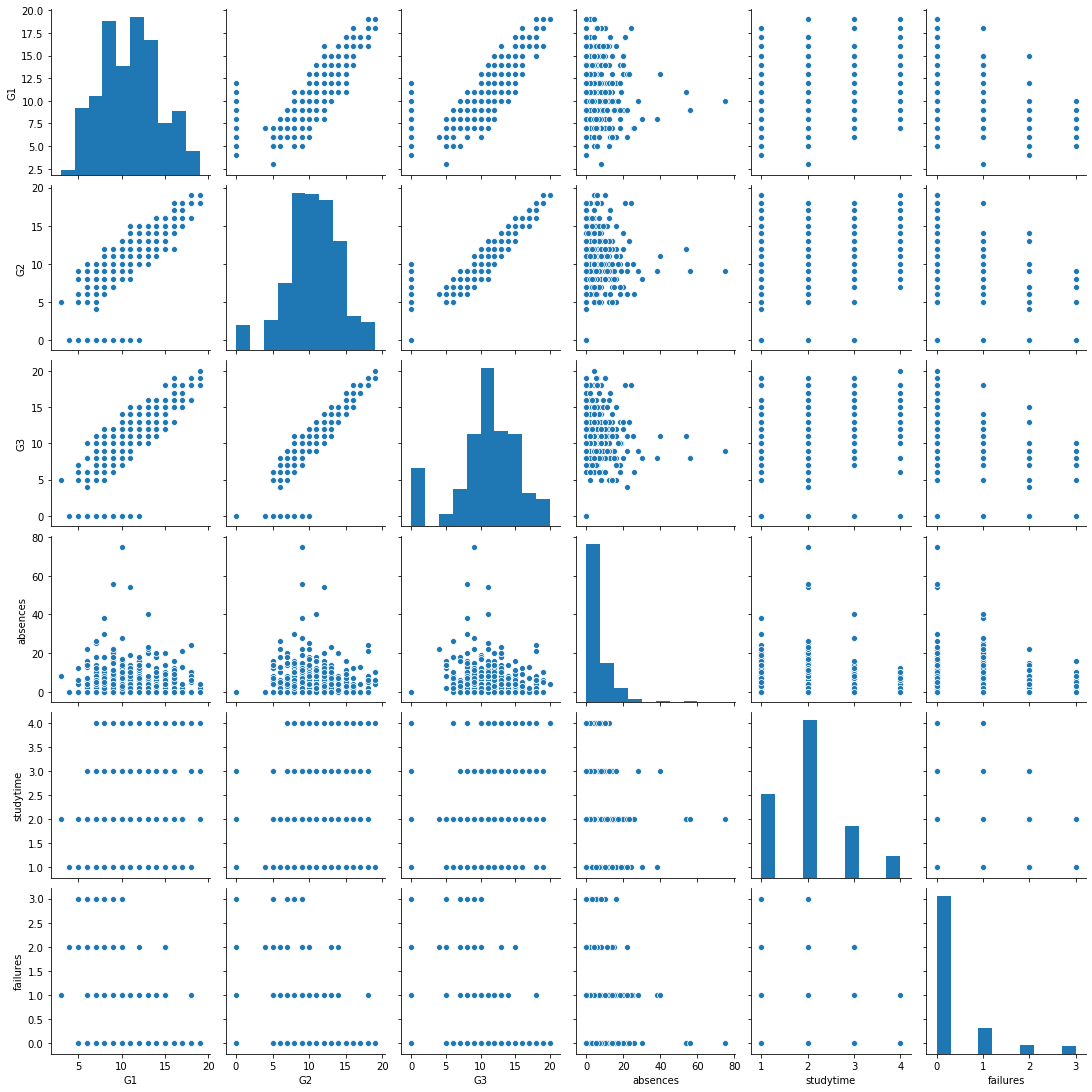

In [31]:
sns.pairplot(data)


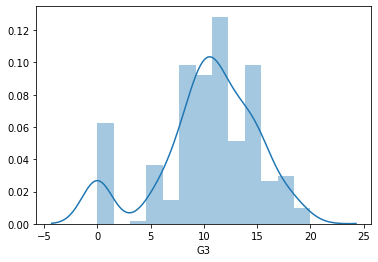

In [35]:
sns.distplot(data['G3'])

In [12]:
y=data.G3
X=data.drop('G3',axis=1)

In [13]:
from sklearn.model_selection import train_test_split


In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.1)

In [16]:
from sklearn import linear_model

In [17]:
linear=linear_model.LinearRegression()
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
acc=linear.score(X_test,y_test)
acc

0.806794801021828

In [20]:
predictions=linear.predict(X_test)

In [21]:
predictions

array([12.22442425,  5.08286398,  8.52697014, -0.82927732,  5.71544146,
        8.29327401, 15.08286868, 11.65806006,  8.44765003,  8.37117272,
       12.70724161,  9.12121351,  3.75017396,  3.75840133,  8.24686595,
        8.23183004, 12.5024918 , 11.72829287, 12.78936703, 10.74537839,
       12.00215256, 14.25773449, 13.67519916, 11.50648935,  7.56391467,
       11.93390262, 13.98189193, 15.64923287,  9.64440163, 12.03988771,
       -0.65646369,  7.24267105, 11.48118943, 14.9463688 , -0.40104161,
       14.50650145, 12.0186073 , 10.75502716, 14.77411664,  7.10673264])

In [26]:
linear.intercept_

-1.432309535846768

In [29]:
coeff_param=pd.DataFrame(linear.coef_,X.columns,columns=['coefficient'])
coeff_param

,coefficient
G1,0.146149
G2,0.972704
absences,0.038949
studytime,-0.137921
failures,-0.282087
